In [1]:
import numpy as np

np.random.seed(1)
x = np.random.normal(size =100)
epsilon = np.random.normal(size=100)
y = x - 2 * x**2 + epsilon

n = number of observations = 100

p = number of predictors = 2 ($X$ and $X^2$)

$Y= X - 2 X^2 + \epsilon$

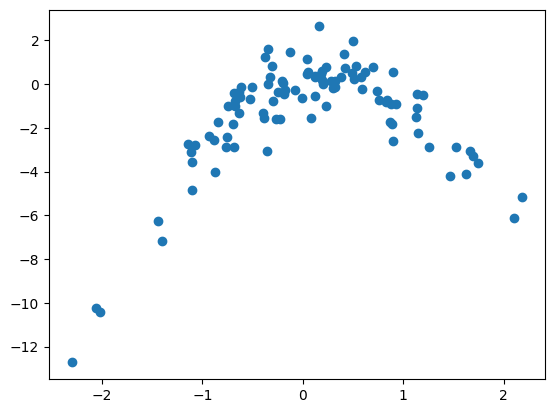

In [2]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

### Comments:

- Quadratic plot
- Convex function with negative concavity
- X from about -2 to 2
- Y from about -10 to 2


In [3]:
# Set new random seed
np.random.seed(5)

In [4]:
from sklearn.model_selection import LeaveOneOut 
# Create LOOCV object
loo = LeaveOneOut()

In [5]:
import pandas as pd
# Organize data into a dataframe (easier to handle)
df = pd.DataFrame({'x':x, 'y':y})

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
# Initiate variables
min_deg = 1  # Minimum degree of the polynomial equations considered
max_deg = 4+1  # Maximum degree of the polynomial equations considered
scores = []

# Compute mean squared error (MSE) for the different polynomial equations.
for i in range(min_deg, max_deg):
    # Leave-one-out cross validation 
    for train, test in loo.split(df):
        X_train = df['x'][train]
        y_train = df['y'][train]
        X_test = df['x'][test]
        y_test = df['y'][test]

        # Pipeline
        model = Pipeline([('poly', PolynomialFeatures(degree = i)),
                      ('linear', LinearRegression())])
        model.fit(X_train.to_numpy()[:, np.newaxis], y_train.to_numpy())

        # MSE
        score = mean_squared_error(y_test.to_numpy(), model.predict(X_test.to_numpy()[:, np.newaxis]))
        scores.append(score)
    print('Model %i (MSE): %f' % (i,np.mean(scores)))
    scores = []

Model 1 (MSE): 6.260764
Model 2 (MSE): 0.914290
Model 3 (MSE): 0.926877
Model 4 (MSE): 0.866912


If we change np.random.seed the result is exactly the same it is beacuse it's the loo.

In [9]:
import statsmodels.api as sm 
# Models with polynomial features
min_deg = 1  
max_deg = 4+1 

for i in range(min_deg, max_deg):
    pol = PolynomialFeatures(degree = i)
    X_pol = pol.fit_transform(df['x'].to_numpy()[:, np.newaxis])
    y = df['y']

    model = sm.OLS(y, X_pol)
    results = model.fit()

    print(results.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     9.997
Date:                Fri, 27 Dec 2024   Prob (F-statistic):            0.00209
Time:                        17:49:06   Log-Likelihood:                -228.87
No. Observations:                 100   AIC:                             461.7
Df Residuals:                      98   BIC:                             466.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4131      0.242     -5.849      0.0

As we can see, when we have a second order polynomial, both x1 and x2 have high t-statistic values. When we have a third order polynomial, x2 has the highest t-statistic in absolute value, followed by x1 and then by x3. Finally, when we have a fourth order polynomial, x2 is the variable with the highest t-statistic, followed by x1, x4 and x3.

We can conclude that x2 and x1 are variables with relevance for the presented models.